# Pypam

## 0. Setup

In [1]:
import sys

!{sys.executable} -m pip install lifewatch-pypam==0.2.1

In [2]:
!{sys.executable} -m pip show xarray


Name: xarray
Version: 2023.1.0
Summary: N-D labeled arrays and datasets in Python
Home-page: https://github.com/pydata/xarray
Author: xarray Developers
Author-email: xarray@googlegroups.com
License: Apache-2.0
Location: /opt/conda/envs/py39/lib/python3.9/site-packages
Requires: numpy, packaging, pandas
Required-by: lifewatch-pypam


### Import packages

In [2]:
import pathlib
import numpy as np
from netCDF4 import Dataset
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import HTML
import io
import base64
import pyhydrophone as pyhy

In [3]:
from pypam.acoustic_survey import ASA
import pypam.utils
import pypam.plots

## 1. Work with wav files

### First, provide all necessary metadata

In [4]:
# Deployment folders (where the wavs are stored)
folder_path_birkenfels = pathlib.Path("./temp/Birkenfels_20210309/records/")
folder_path_grafton = pathlib.Path("./temp/Grafton_20210309/records/")

In [5]:
# Define the hydrophone as an object using pyhydrophone with all its associated metadata
rtsys_name = 'RTSys'
rtsys_model = 'RESEA320'
rtsys_sensitivity = -180
rtsys_preamp_gain = 0
rtsys_Vpp = 2.0
serial_number = 3
rtsys = pyhy.RTSys(name=rtsys_name, model=rtsys_model, serial_number=serial_number, sensitivity=rtsys_sensitivity,
                   preamp_gain=rtsys_preamp_gain, Vpp=rtsys_Vpp, mode='lowpower', channel='A')

### Define a deployment object (acoustic survey)

In [6]:
# Define the metadata parameters
p_ref = 1.0
binsize = 60.0
bin_overlap = 0
nfft = 48000
fft_overlap = 0.5
timezone = 'UTC'
channel = 0
calibration = -1
dc_subtract = 1

# Declare the objects
asa_birkenfels = ASA(hydrophone=rtsys, folder_path=folder_path_birkenfels, p_ref=p_ref, binsize=binsize, bin_overlap=bin_overlap, nfft=nfft, fft_overlap=fft_overlap, timezone=timezone, channel=channel, calibration=calibration, dc_subtract=dc_subtract)
asa_grafton = ASA(hydrophone=rtsys, folder_path=folder_path_grafton, p_ref=p_ref, binsize=binsize, bin_overlap=bin_overlap, nfft=nfft, fft_overlap=fft_overlap, timezone=timezone, channel=channel, calibration=calibration, dc_subtract=dc_subtract)

### Compute millidecade_bands

In [7]:
# Define the percentiles
percentiles = [1, 50, 99]

# Compute the hybrid millidecade bands 
ds_birkenfels = asa_birkenfels.hybrid_millidecade_bands(db=True, method='density', band=(0, 24000), percentiles=percentiles)
ds_grafton = asa_grafton.hybrid_millidecade_bands(db=True, method='density', band=(0, 24000), percentiles=percentiles)

  0%|          | 0/7 [00:00<?, ?it/s]

temp/Birkenfels_20210309/records/channelA_2021-03-15_00-04-27.wav


  0%|          | 0/1 [00:00<?, ?it/s]

 14%|█▍        | 1/7 [00:01<00:06,  1.03s/it]

temp/Birkenfels_20210309/records/channelA_2021-03-15_00-09-33.wav


0it [00:00, ?it/s]

 29%|██▊       | 2/7 [00:01<00:03,  1.65it/s]

temp/Birkenfels_20210309/records/channelA_2021-03-15_00-14-39.wav


0it [00:00, ?it/s]

 43%|████▎     | 3/7 [00:01<00:01,  2.14it/s]

temp/Birkenfels_20210309/records/channelA_2021-03-15_00-19-45.wav


0it [00:00, ?it/s]

 57%|█████▋    | 4/7 [00:01<00:01,  2.48it/s]

temp/Birkenfels_20210309/records/channelA_2021-03-15_00-24-51.wav


0it [00:00, ?it/s]

 71%|███████▏  | 5/7 [00:02<00:00,  2.75it/s]

temp/Birkenfels_20210309/records/channelA_2021-03-15_00-29-57.wav


  0%|          | 0/1 [00:00<?, ?it/s]

 86%|████████▌ | 6/7 [00:02<00:00,  2.26it/s]

temp/Birkenfels_20210309/records/channelA_2021-03-15_00-35-03.wav


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

temp/Grafton_20210309/records/channelA_2021-03-16_00-18-31.wav


  0%|          | 0/1 [00:00<?, ?it/s]

 14%|█▍        | 1/7 [00:00<00:01,  4.16it/s]

temp/Grafton_20210309/records/channelA_2021-03-16_00-28-45.wav


  0%|          | 0/1 [00:00<?, ?it/s]

 29%|██▊       | 2/7 [00:00<00:01,  4.09it/s]

temp/Grafton_20210309/records/channelA_2021-03-16_00-38-59.wav


  0%|          | 0/1 [00:00<?, ?it/s]

 43%|████▎     | 3/7 [00:00<00:00,  4.06it/s]

temp/Grafton_20210309/records/channelA_2021-03-16_00-49-12.wav


  0%|          | 0/2 [00:00<?, ?it/s]

 57%|█████▋    | 4/7 [00:01<00:00,  3.47it/s]

temp/Grafton_20210309/records/channelA_2021-03-16_00-59-26.wav


  0%|          | 0/2 [00:00<?, ?it/s]

 71%|███████▏  | 5/7 [00:01<00:00,  3.26it/s]

temp/Grafton_20210309/records/channelA_2021-03-16_01-09-39.wav


  0%|          | 0/2 [00:00<?, ?it/s]

 86%|████████▌ | 6/7 [00:01<00:00,  3.14it/s]

temp/Grafton_20210309/records/channelA_2021-03-16_01-19-53.wav


  0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 7/7 [00:02<00:00,  3.33it/s]


In [8]:
ds_birkenfels
ds_grafton

<xarray.Dataset>
Dimensions:            (id: 18, frequency: 24001, percentiles: 3,
                        frequency_bins: 2178)
Coordinates:
  * id                 (id) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17
    datetime           (id) datetime64[ns] 2021-03-16T00:18:31 ... 2021-03-16...
  * frequency          (frequency) float64 0.0 1.0 2.0 ... 2.4e+04 2.4e+04
    start_sample       (id) int64 0 2880000 0 2880000 ... 0 2880000 5760000
    end_sample         (id) int64 2880000 5760000 2880000 ... 5760000 8640000
  * percentiles        (percentiles) int64 1 50 99
    file_path          (id) <U62 'temp/Grafton_20210309/records/channelA_2021...
    _start_frame       (id) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  * frequency_bins     (frequency_bins) float64 0.0 1.0 ... 2.396e+04 2.4e+04
    lower_frequency    (frequency_bins) float64 -0.5 0.5 ... 2.393e+04 2.399e+04
    upper_frequency    (frequency_bins) float64 0.5 1.5 ... 2.399e+04 2.4e+04
Data variables:
    band_density       (id, frequency) float64 3.126e+12 1.567e+12 ... 276.2
    value_percentiles  (id, percentiles) float64 3.195e+03 ... 1.625e+08
    millidecade_bands  (id, frequency_bins) float64 124.9 122.0 ... 28.36 28.33
Attributes: (12/18)
    binsize:                 60.0
    nfft:                    48000
    bin_overlap:             0
    fft_overlap:             0.5
    timezone:                UTC
    datetime_timezone:       UTC
    ...                      ...
    hydrophone_preamp_gain:  10.969100130080562
    hydrophone_Vpp:          5.0
    _start_frame:            0
    calibration:             -1
    fs:                      48000
    file_path:               temp/Grafton_20210309/records/channelA_2021-03-1...

We can then save the datasets we obtained as NETCDF files 

In [9]:
ds_birkenfels.to_netcdf('./temp/birkenfels_test.nc')
ds_grafton.to_netcdf('./temp/grafton_test.nc')

In [10]:
# Select the frequency range of interest. For example, for these data we don't want frequencies lower than 10 Hz 
ds_birkenfels = ds_birkenfels.where(ds_birkenfels.frequency_bins >= 10, drop=True)
ds_grafton = ds_grafton.where(ds_grafton.frequency_bins >= 10, drop=True)

In [11]:
# Compute SPD from the millidecade bands 
ds_spd_birkenfels = pypam.utils.compute_spd(ds_birkenfels, data_var='millidecade_bands', percentiles=percentiles)
ds_spd_grafton = pypam.utils.compute_spd(ds_grafton, data_var='millidecade_bands', percentiles=percentiles)

In [12]:
ds_spd_birkenfels

<xarray.Dataset>
Dimensions:            (frequency_bins: 2168, spl: 105, percentiles: 3)
Coordinates:
  * frequency_bins     (frequency_bins) float64 10.0 11.0 ... 2.396e+04 2.4e+04
  * spl                (spl) float64 0.0 1.0 2.0 3.0 ... 101.0 102.0 103.0 104.0
  * percentiles        (percentiles) <U3 'L99' 'L50' 'L1'
Data variables:
    spd                (frequency_bins, spl) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    value_percentiles  (frequency_bins, percentiles) float64 55.18 ... 40.28

## 2. Let's plot the results!

First, we will imagine that we have already processed a long deployment instead of only a few files. We stored the resulting netcdf's so we can explore the possibilities to plotting the results

Let's start with the millidecade bands

In [13]:
# Define the folders where the daily millidecade bands are processed:
millidecade_bands_birkenfels_path = pathlib.Path("./temp/Birkenfels_20210309/Band_density/")
millidecade_bands_grafton_path = pathlib.Path("./temp/Grafton_20210309/Band_density/")

Then we can load all the computed daily millidecade bands in one xarray dataset:

In [14]:
# Load all the daily netcdf files
da_birkenfels = pypam.utils.join_all_ds_output_deployment(deployment_path=millidecade_bands_birkenfels_path, data_var_name='millidecade_bands')
da_grafton = pypam.utils.join_all_ds_output_deployment(deployment_path=millidecade_bands_grafton_path, data_var_name='millidecade_bands')

# Select the frequency band to work with 
da_grafton = da_grafton.where(da_grafton.frequency_bins >= 10, drop=True)
da_birkenfels = da_birkenfels.where(da_birkenfels.frequency_bins >= 10, drop=True)

# Select ONLY the millidecade bands
ds_grafton = xr.Dataset(data_vars={'millidecade_bands': da_grafton})
ds_birkenfels = xr.Dataset(data_vars={'millidecade_bands': da_birkenfels})

100%|██████████| 7/7 [00:00<00:00, 33.46it/s]


In [15]:
ds_grafton = ds_grafton.sortby('datetime')
ds_birkenfels = ds_birkenfels.sortby('datetime')

### Plot the HMB as long-term spectrograms

/opt/conda/envs/py39/lib/python3.9/site-packages/pypam/plots.py:243: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


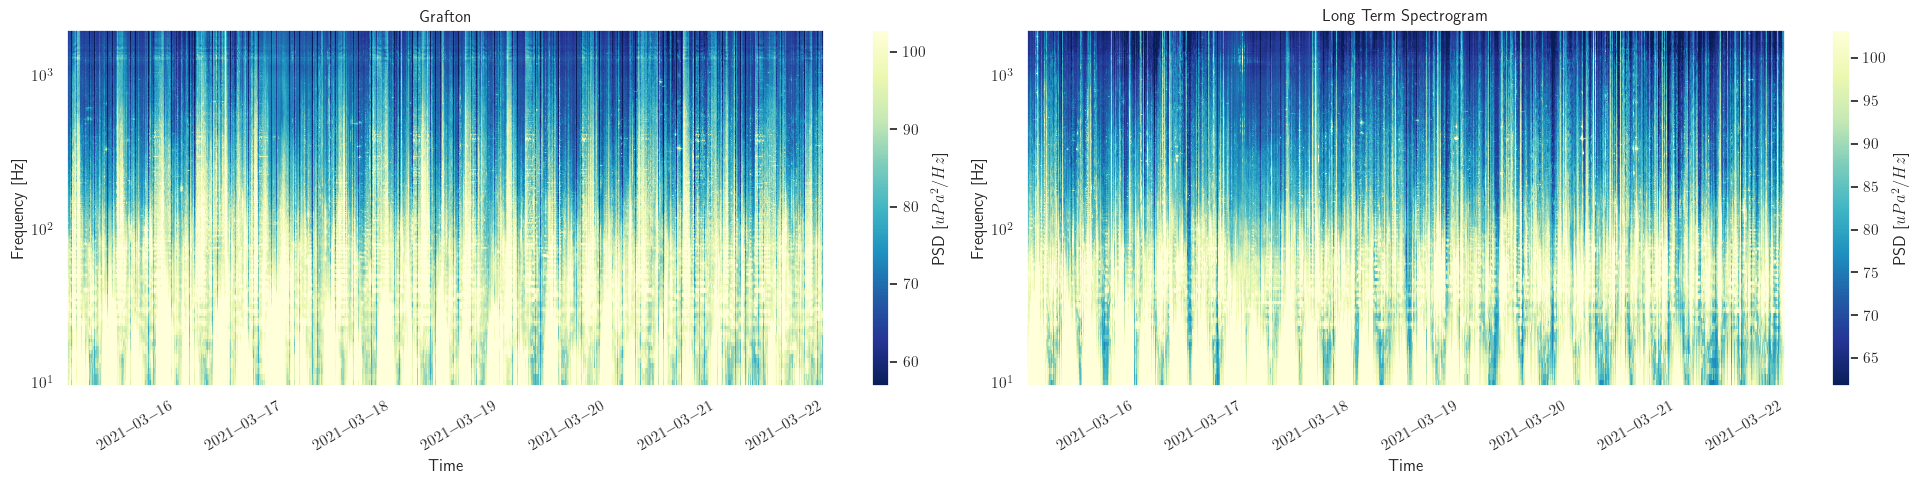

In [16]:
fig, ax = plt.subplots(1, 2, sharex='all', figsize=(20, 5))
pypam.plots.plot_ltsa(ds=ds_birkenfels, data_var='millidecade_bands', log=True, save_path=None, ax=ax[0], show=False)
ax[0].set_title('Birkenfels')
pypam.plots.plot_ltsa(ds=ds_grafton, data_var='millidecade_bands', log=True, save_path=None, ax=ax[1], show=False)
ax[0].set_title('Grafton')
plt.show()

### Plot the SPD

In [17]:
# First, convert the HMB output to SPD like we did for the small wav files examples
ds_spd_birkenfels = pypam.utils.compute_spd(ds_birkenfels, data_var='millidecade_bands', percentiles=percentiles)
ds_spd_grafton = pypam.utils.compute_spd(ds_grafton, data_var='millidecade_bands', percentiles=percentiles)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


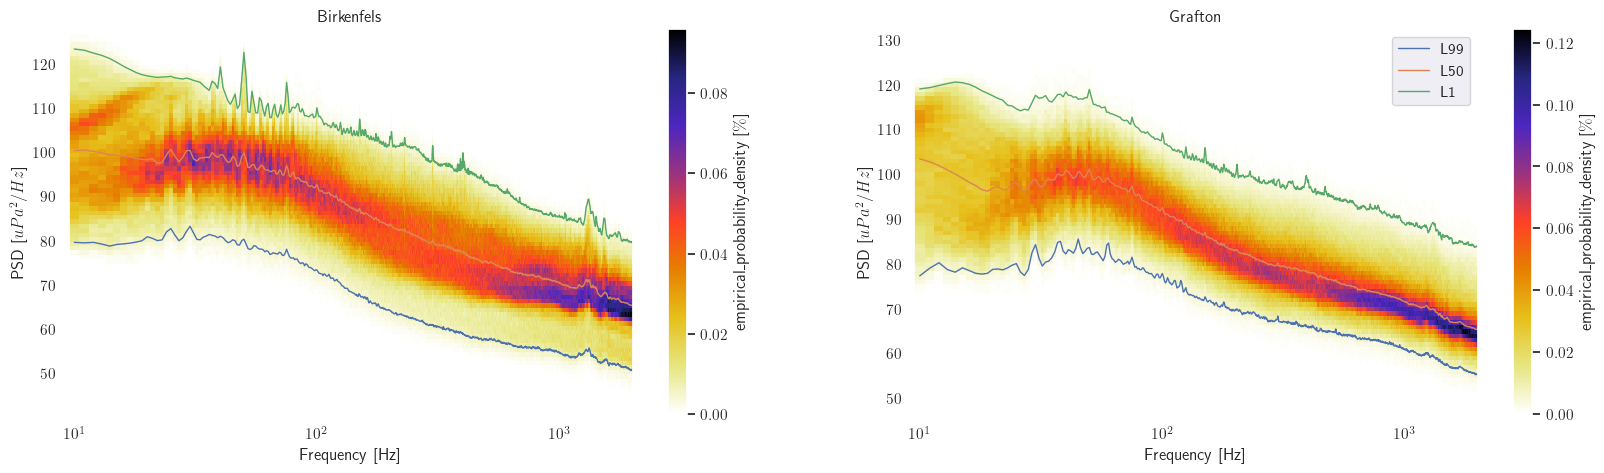

In [18]:
# Plot the obtained output
fig, ax = plt.subplots(1, 2, sharex='all', figsize=(20, 5))
pypam.plots.plot_spd(spd=ds_spd_birkenfels, log=True, save_path=None, ax=ax[0], show=False)
ax[0].set_title('Birkenfels')
pypam.plots.plot_spd(spd=ds_spd_grafton, log=True, save_path=None, ax=ax[1], show=False)
ax[1].set_title('Grafton')
plt.show()
plt.close()

## Plot a summary

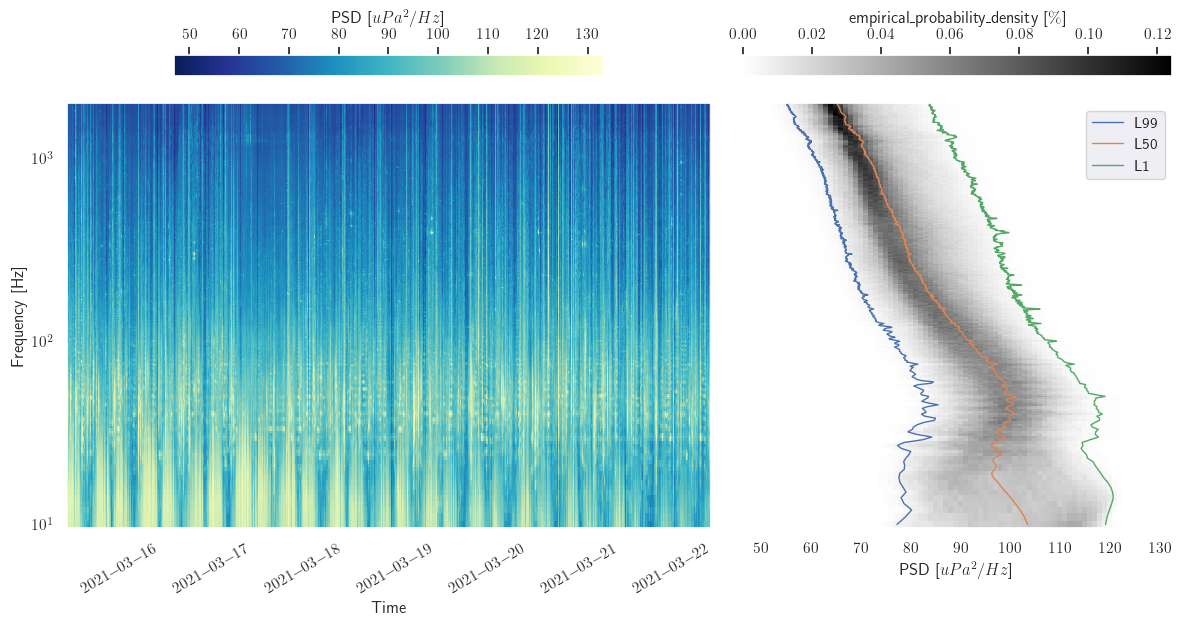

In [19]:
# If we're not interested in the location
pypam.plots.plot_summary_dataset(ds_grafton, percentiles, data_var='millidecade_bands', time_coord='datetime', freq_coord='frequency_bins',
                         min_val=None, max_val=None, show=True, log=True, save_path=None,
                         location=None)

We can also specify the location and then the day/night patter will be shown. But then we need to install the pvblib package

In [20]:
!{sys.executable} -m pip install pvlib

/bin/bash: line 1: {sys.executable}: command not found


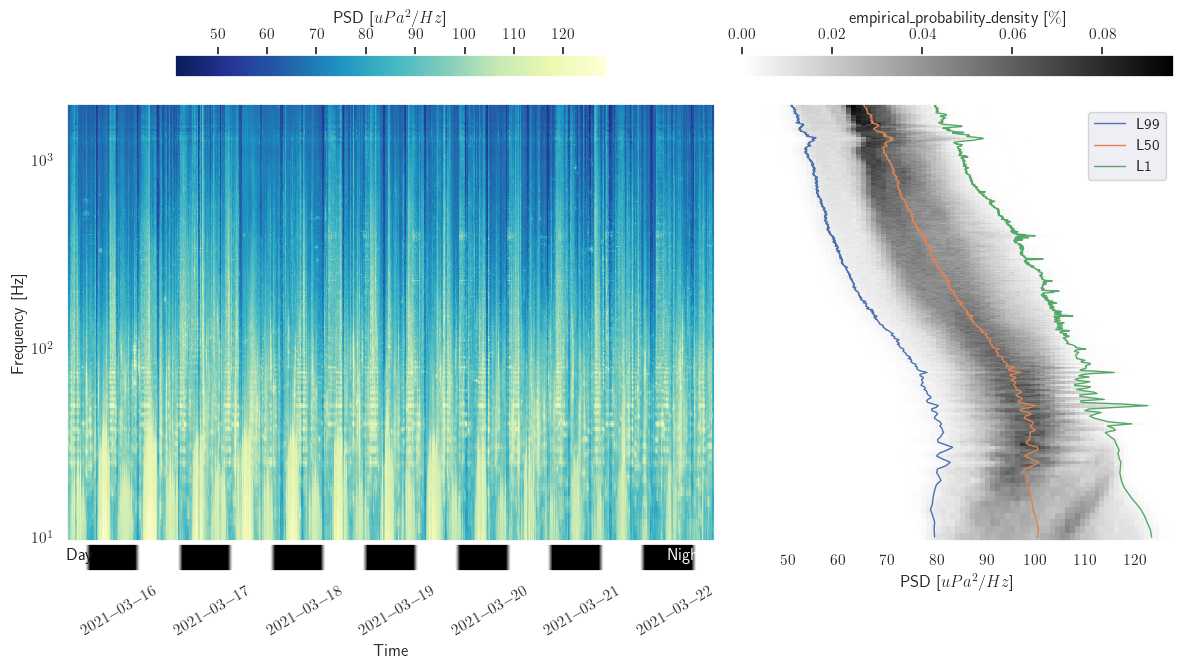

In [21]:
birkenfels_location = [2.536166667, 51.64833333] # Lon, Lat
pypam.plots.plot_summary_dataset(ds_birkenfels, percentiles, data_var='millidecade_bands', time_coord='datetime', freq_coord='frequency_bins',
                         min_val=None, max_val=None, show=True, log=True, save_path=None,
                         location=birkenfels_location)


### Plot aggregations in time

In [32]:
# Compute the aggregations. First define the frequency aggregation to be 'H' or 'd' or 'week'
freq = 'H'
ds_aggregation_birkenfels = pypam.utils.bin_aggregation(ds=ds_birkenfels, data_var='millidecade_bands', band=[10, 1000], freq=freq)
ds_aggregation_grafton = pypam.utils.bin_aggregation(ds=ds_grafton, data_var='millidecade_bands', band=[10, 1000], freq=freq)

/opt/conda/envs/py39/lib/python3.9/site-packages/pypam/plots.py:488: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_74247/3778303158.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


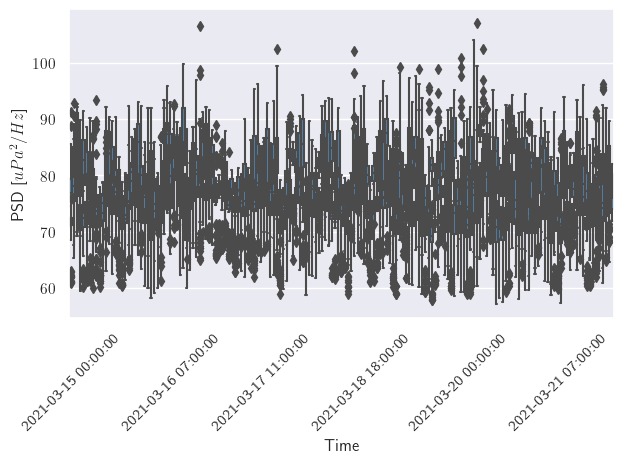

In [33]:
# Plot the two stations together
ax = pypam.plots.plot_aggregation_evolution(ds=ds_aggregation_birkenfels, data_var='millidecade_bands', mode='boxplot', show=False)
pypam.plots.plot_aggregation_evolution(ds=ds_aggregation_grafton, data_var='millidecade_bands', mode='boxplot', ax=ax, show=False)
plt.tight_layout()
plt.show()
plt.close()

This might be a bit messy, let's do the same and choose daily aggregations instead of hourly

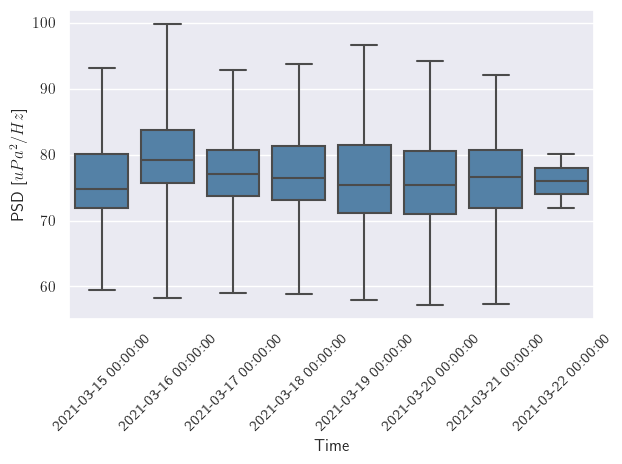

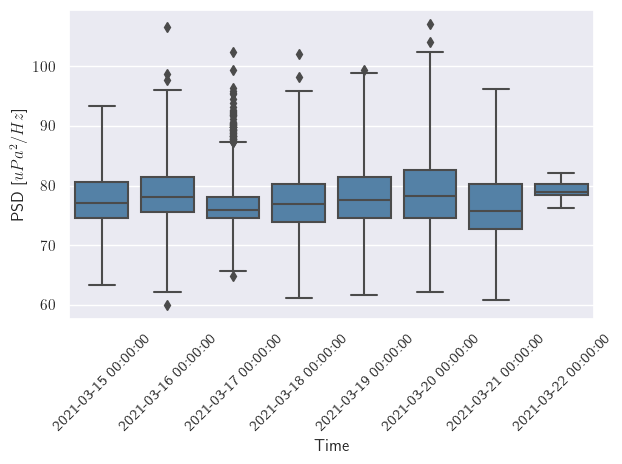

<Axes: xlabel='Time', ylabel='PSD [$uPa^2/Hz$]'>

In [35]:
# Compute the aggregations. First define the frequency aggregation to be 'H' or 'd' or 'week'
freq = 'd'
ds_aggregation_birkenfels = pypam.utils.bin_aggregation(ds=ds_birkenfels, data_var='millidecade_bands', band=[10, 1000], freq=freq)
ds_aggregation_grafton = pypam.utils.bin_aggregation(ds=ds_grafton, data_var='millidecade_bands', band=[10, 1000], freq=freq)

pypam.plots.plot_aggregation_evolution(ds=ds_aggregation_birkenfels, data_var='millidecade_bands', mode='boxplot', show=True)
pypam.plots.plot_aggregation_evolution(ds=ds_aggregation_grafton, data_var='millidecade_bands', mode='boxplot', show=True)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


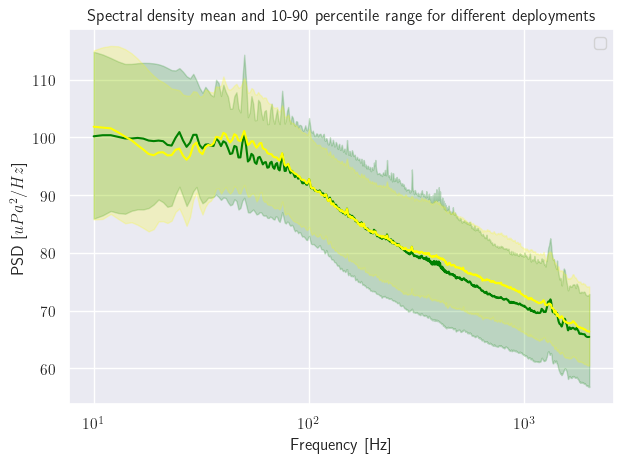

In [43]:

# Spectral Density Mean

fig, ax = plt.subplots()
color_list = ['green', 'yellow']
percentiles = [10, 90]

pxx_b = ds_birkenfels['millidecade_bands'].to_numpy().T
p = np.nanpercentile(a=pxx_b, q=np.array(percentiles), axis=1)
ax.plot(ds_birkenfels.frequency_bins.values, ds_birkenfels['millidecade_bands'].mean(dim='datetime').values,
        color=color_list[0])
ax.fill_between(x=ds_birkenfels.frequency_bins.values, y1=p[0], y2=p[1], alpha=0.2, color=color_list[0])

pxx_g = ds_grafton['millidecade_bands'].to_numpy().T
p = np.nanpercentile(a=pxx_g, q=np.array(percentiles), axis=1)
ax.plot(ds_grafton.frequency_bins.values, ds_grafton['millidecade_bands'].mean(dim='datetime').values,
        color=color_list[1])
ax.fill_between(x=ds_grafton.frequency_bins.values, y1=p[0], y2=p[1], alpha=0.2, color=color_list[1])

ax.set_xscale('log')
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'%s [$%s$]' % (ds_birkenfels['millidecade_bands'].standard_name, ds_birkenfels['millidecade_bands'].units))
plt.title("Spectral density mean and 10-90 percentile range for different deployments")
plt.tight_layout()
plt.show()
plt.close()
